In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../Cagri/orders_export_1.csv')

# Display the first few rows to understand the structure of the data
print(df.head())

    Name                                    Email Financial Status  \
0  #3662                info@rctruckequipment.com             paid   
1  #3661                  gusferbaker17@gmail.com             paid   
2  #3660                      darren@moranmfg.com          pending   
3  #3659                        9347460@gmail.com             paid   
4  #3658  luka.nikolaishvili@universaltransit.com             paid   

                     Paid at Fulfillment Status               Fulfilled at  \
0  2024-06-14 13:21:31 -0700          fulfilled  2024-06-14 14:01:01 -0700   
1  2024-06-12 17:28:37 -0700          fulfilled  2024-06-13 10:53:06 -0700   
2                        NaN          fulfilled  2024-06-12 12:40:16 -0700   
3  2024-06-12 09:51:07 -0700          fulfilled  2024-06-12 10:47:36 -0700   
4  2024-06-12 07:21:37 -0700          fulfilled  2024-06-12 10:53:18 -0700   

  Accepts Marketing Currency  Subtotal  Shipping  ...  Tax 5 Value  Phone  \
0                no      USD    8

In [24]:
# Convert date columns to datetime
date_columns = ['Paid at', 'Fulfilled at', 'Created at', 'Cancelled at', 'Next Payment Due At']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert numeric columns to numeric types
numeric_columns = ['Subtotal', 'Shipping', 'Taxes', 'Total', 'Discount Amount', 'Lineitem price', 'Lineitem compare at price', 'Refunded Amount', 'Lineitem discount', 'Tax 1 Value', 'Tax 2 Value', 'Tax 3 Value', 'Tax 4 Value', 'Tax 5 Value', 'Duties']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values if necessary
df.fillna(0, inplace=True)

/var/folders/8b/1r7k6hy13dsd_wfwtqyfg77c0000gn/T/ipykernel_19129/650060576.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/8b/1r7k6hy13dsd_wfwtqyfg77c0000gn/T/ipykernel_19129/650060576.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/8b/1r7k6hy13dsd_wfwtqyfg77c0000gn/T/ipykernel_19129/650060576.py:4: FutureWarni

In [25]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Name', 'Email', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing Name', 'Billing Street',
       'Billing Address1', 'Billing Address2', 'Billing Company',
       'Billing City', 'Billing Zip', 'Billing Province', 'Billing Country',
       'Billing Phone', 'Shipping Name', 'Shipping Street',
       'Shipping Address1', 'Shipping Address2', 'Shipping Company',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Country', 'Shipping Phone', 'Notes', 'Note Attributes',
       'Cancelled at', 'Payment Method', 'Payment Reference',
       'Refunded Amount', 'Vendor', '

In [27]:
df.index = pd.to_datetime(df.index)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


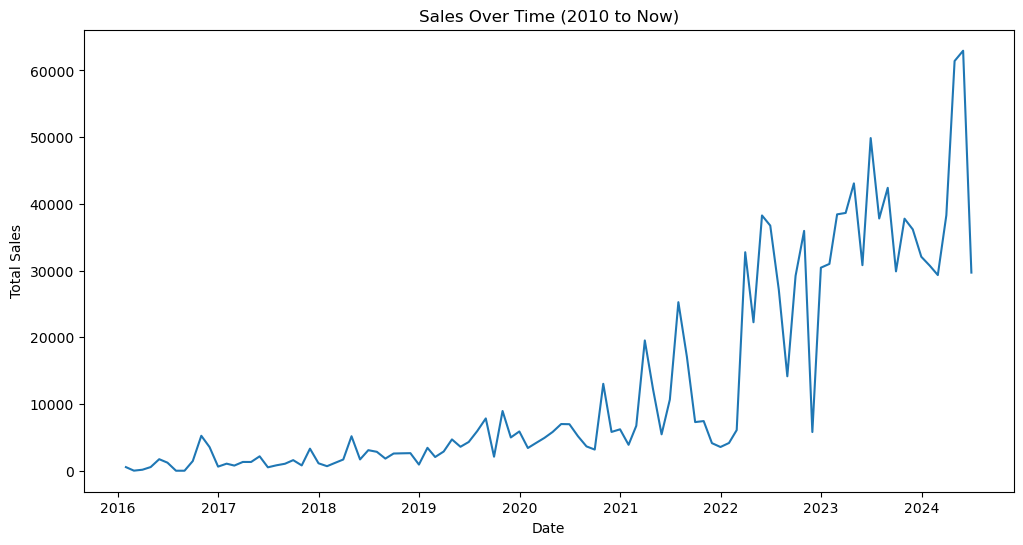

In [29]:
# Sort the index in ascending order
df.sort_index(inplace=True)

# Slice the DataFrame to include data from 2010 to now
df = df['2010-01-01':]

# Resample sales data by month
sales_over_time = df.resample('M').agg({'Total': 'sum'})

# Plot the sales over time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x=sales_over_time.index, y='Total')
plt.title('Sales Over Time (2010 to Now)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()





In [47]:
top_products = df.groupby('Lineitem sku').agg({'Lineitem quantity': 'sum'}).sort_values(by='Lineitem quantity', ascending=False).head(10)

# Plot the top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y='Lineitem quantity', data=top_products)
plt.title('Top 10 Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


KeyError: 'Lineitem sku'

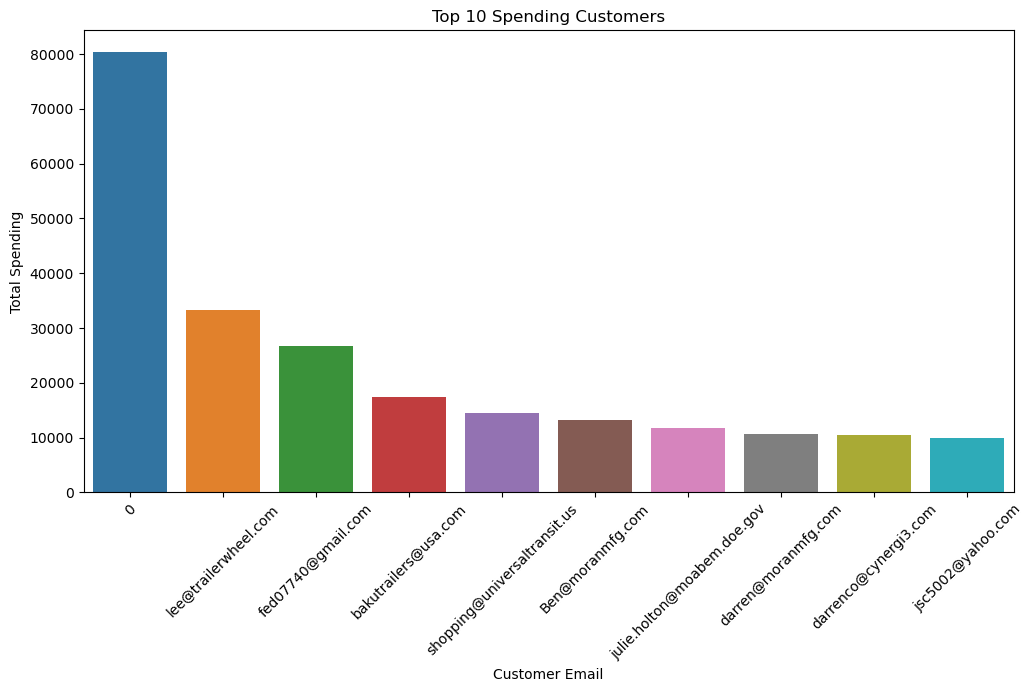

In [31]:
# Total spending by each customer
customer_spending = df.groupby('Email').agg({'Total': 'sum'}).sort_values(by='Total', ascending=False).head(10)

# Plot the top spending customers
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_spending.index, y='Total', data=customer_spending)
plt.title('Top 10 Spending Customers')
plt.xlabel('Customer Email')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()


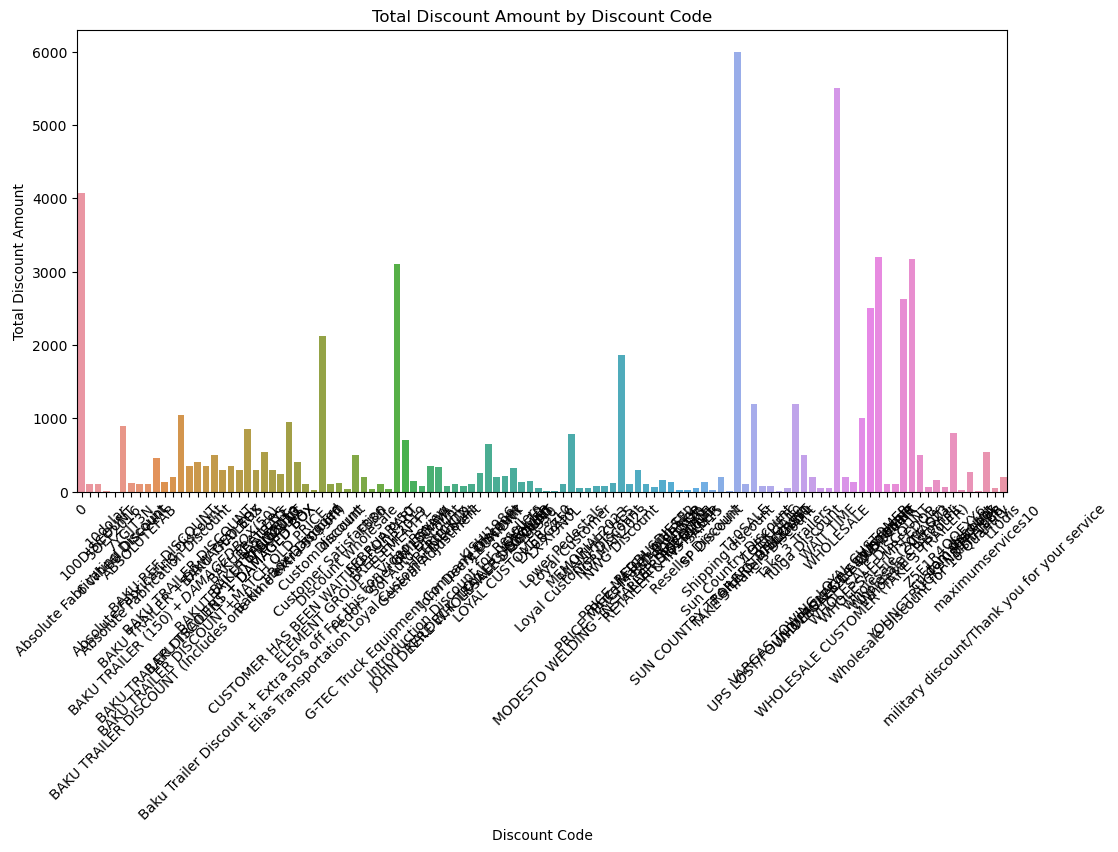

In [32]:
# Total discount amount per order
discount_analysis = df[df['Discount Amount'] > 0].groupby('Discount Code').agg({'Discount Amount': 'sum', 'Total': 'sum'})

# Plot discount analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=discount_analysis.index, y='Discount Amount', data=discount_analysis)
plt.title('Total Discount Amount by Discount Code')
plt.xlabel('Discount Code')
plt.ylabel('Total Discount Amount')
plt.xticks(rotation=45)
plt.show()


           Subtotal     Shipping        Taxes         Total  Discount Amount  \
count   2833.000000  2833.000000  2833.000000   2833.000000      2833.000000   
mean     409.348630    43.813307     2.713865    455.440579        20.897279   
std      691.385328    85.679275    16.140868    754.685890       205.507364   
min        0.000000     0.000000     0.000000      0.000000         0.000000   
25%       29.970000     5.990000     0.000000     34.980000         0.000000   
50%      129.950000     9.990000     0.000000    149.940000         0.000000   
75%      699.950000    59.950000     0.000000    769.900000         0.000000   
max    10000.000000  2200.000000   333.000000  11783.920000      5999.800000   

       Lineitem price  Lineitem compare at price  Refunded Amount  \
count     2833.000000                2833.000000      2833.000000   
mean       340.287222                 416.529072        43.498902   
std        432.257527                 517.888819       198.331229   
min

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


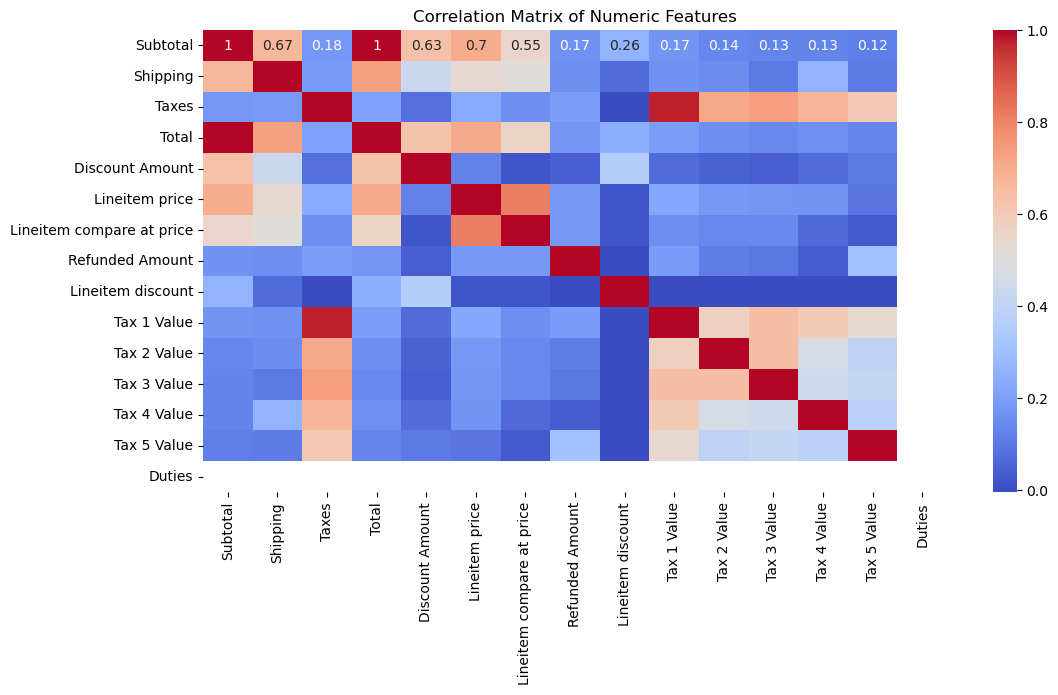

In [33]:
# Summary statistics for numeric columns
summary_stats = df[numeric_columns].describe()
print(summary_stats)

# Correlation matrix
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

# Plot correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


Percentage of repeat customers: 10.57%


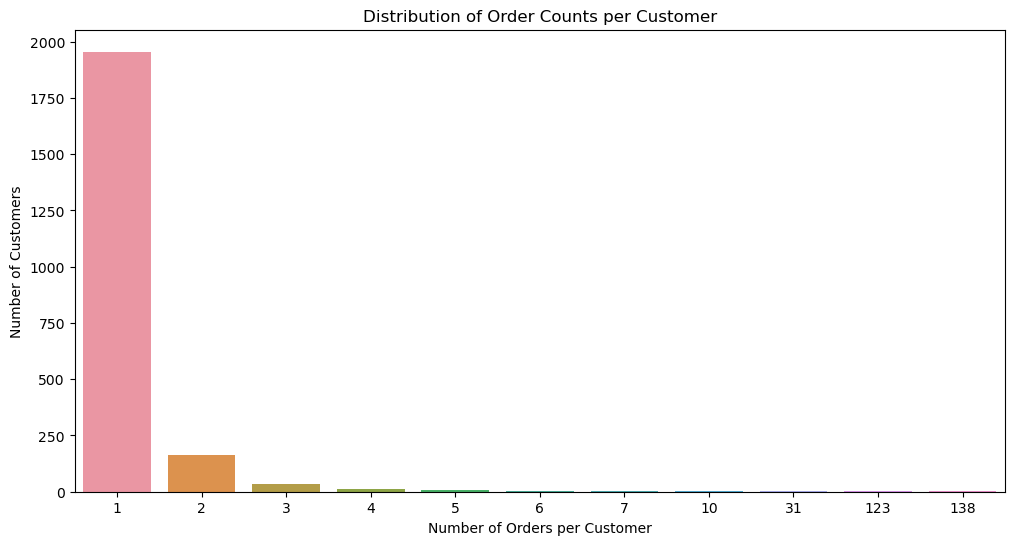

In [39]:

# Count the number of orders per customer
customer_orders = df.groupby('Email').agg({'Id': 'count'}).rename(columns={'Id': 'Order Count'}).reset_index()

# Classify customers as repeat customers if they have more than one order
customer_orders['Repeat Customer'] = customer_orders['Order Count'] > 1

# Analyze the percentage of repeat customers
repeat_customer_percentage = customer_orders['Repeat Customer'].mean() * 100
print(f"Percentage of repeat customers: {repeat_customer_percentage:.2f}%")

# Plot the distribution of order counts per customer as a bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=customer_orders, x='Order Count')
plt.title('Distribution of Order Counts per Customer')
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Number of Customers')
plt.show()


Percentage of repeat customers: 10.57%


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


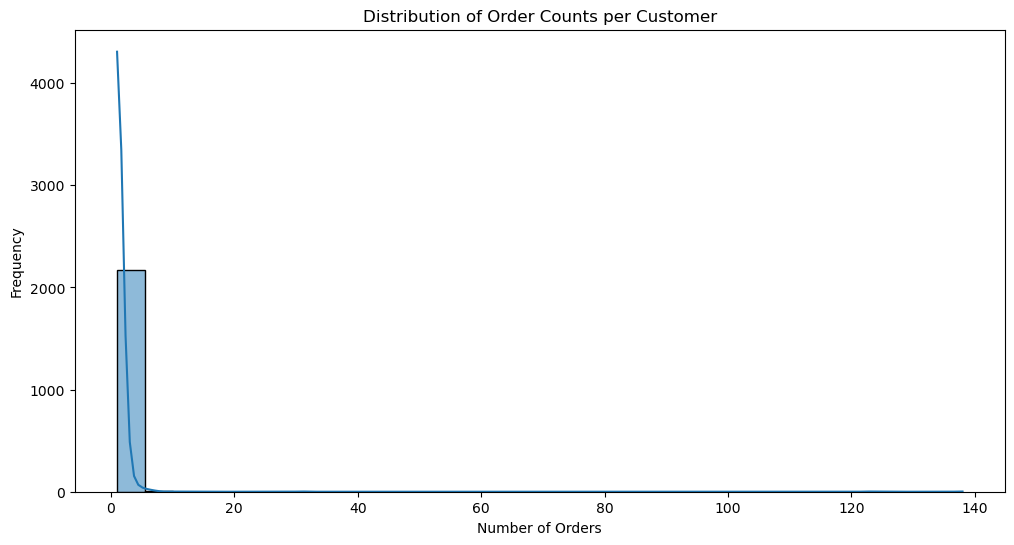

In [34]:
# Count the number of orders per customer
customer_orders = df.groupby('Email').agg({'Id': 'count'}).rename(columns={'Id': 'Order Count'}).reset_index()

# Classify customers as repeat customers if they have more than one order
customer_orders['Repeat Customer'] = customer_orders['Order Count'] > 1

# Analyze the percentage of repeat customers
repeat_customer_percentage = customer_orders['Repeat Customer'].mean() * 100
print(f"Percentage of repeat customers: {repeat_customer_percentage:.2f}%")

# Plot the distribution of order counts per customer
plt.figure(figsize=(12, 6))
sns.histplot(customer_orders['Order Count'], bins=30, kde=True)
plt.title('Distribution of Order Counts per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()


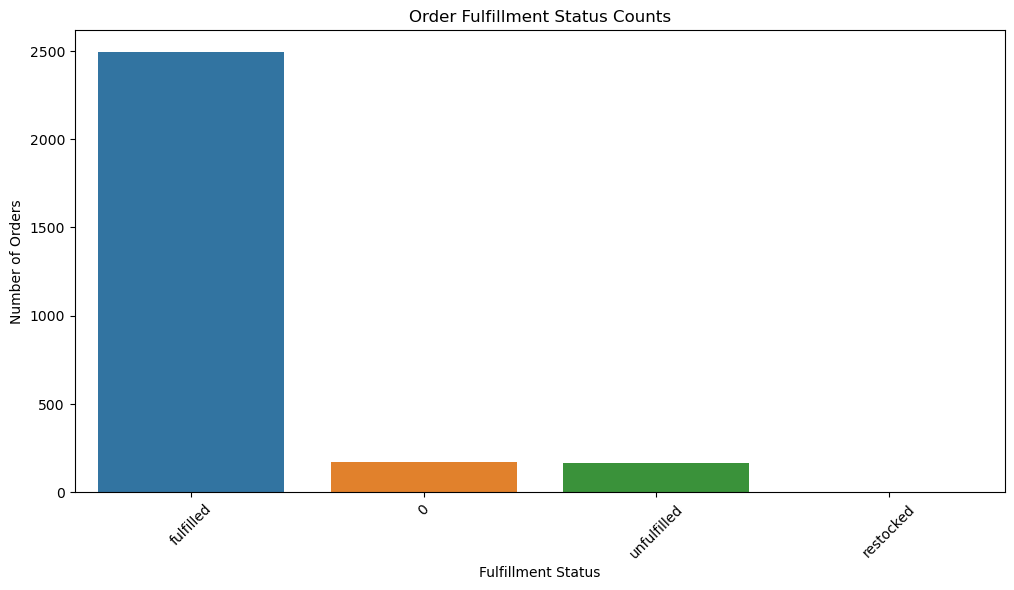

In [35]:
# Count the number of orders by fulfillment status
fulfillment_status_counts = df['Fulfillment Status'].value_counts()

# Plot the fulfillment status counts
plt.figure(figsize=(12, 6))
sns.barplot(x=fulfillment_status_counts.index, y=fulfillment_status_counts.values)
plt.title('Order Fulfillment Status Counts')
plt.xlabel('Fulfillment Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


count     342.000000
mean      360.328626
std       460.631399
min         3.800000
25%        69.942500
50%       149.940000
75%       599.900000
max      4252.940000
Name: Refunded Amount, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


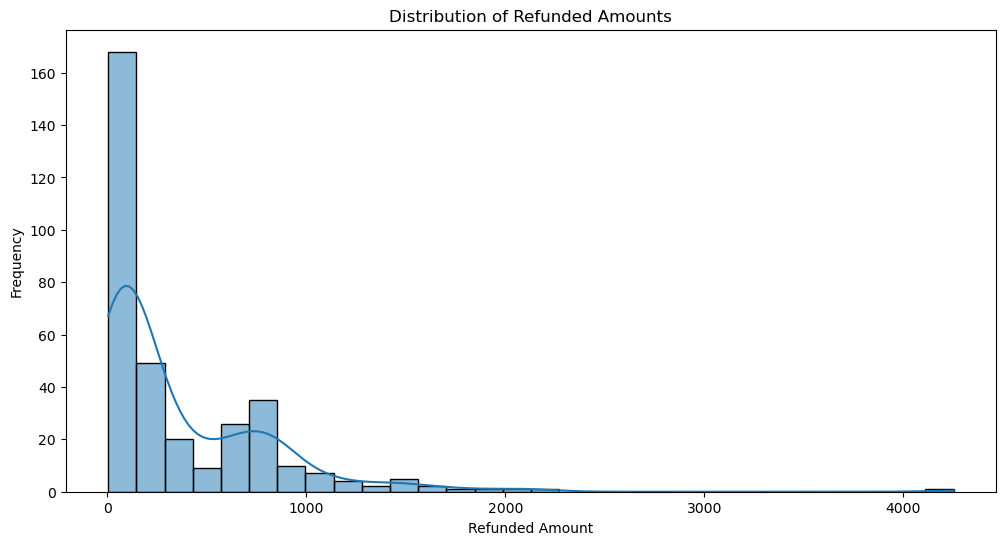

In [36]:
# Filter orders with refunded amounts
refunded_orders = df[df['Refunded Amount'] > 0]

# Summary statistics for refunded amounts
refunded_summary = refunded_orders['Refunded Amount'].describe()
print(refunded_summary)

# Plot refunded amounts
plt.figure(figsize=(12, 6))
sns.histplot(refunded_orders['Refunded Amount'], bins=30, kde=True)
plt.title('Distribution of Refunded Amounts')
plt.xlabel('Refunded Amount')
plt.ylabel('Frequency')
plt.show()

# Analyze reasons for refunds if available (assuming a column 'Refund Reason' exists)
if 'Refund Reason' in df.columns:
    refund_reasons_counts = refunded_orders['Refund Reason'].value_counts()
    
    # Plot the refund reasons
    plt.figure(figsize=(12, 6))
    sns.barplot(x=refund_reasons_counts.index, y=refund_reasons_counts.values)
    plt.title('Refund Reasons')
    plt.xlabel('Reason')
    plt.ylabel('Number of Refunds')
    plt.xticks(rotation=45)
    plt.show()


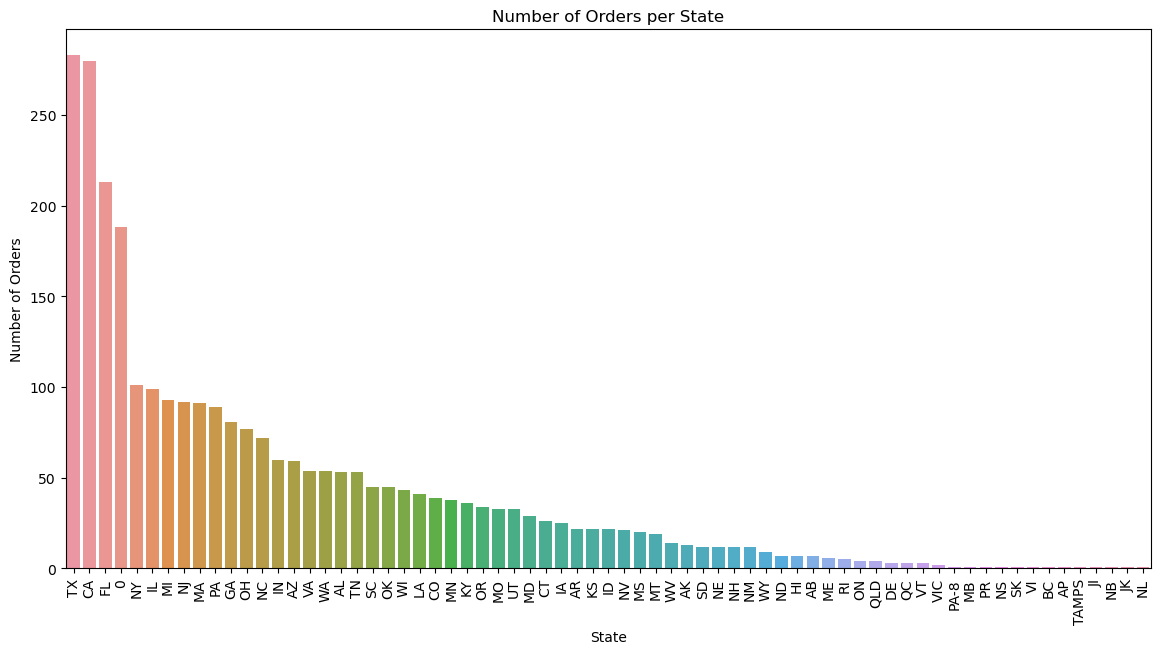

In [37]:
# Count the number of orders per state
orders_per_state = df['Billing Province'].value_counts().reset_index()
orders_per_state.columns = ['State', 'Order Count']

# Plot the number of orders per state
plt.figure(figsize=(14, 7))
sns.barplot(x='State', y='Order Count', data=orders_per_state)
plt.title('Number of Orders per State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


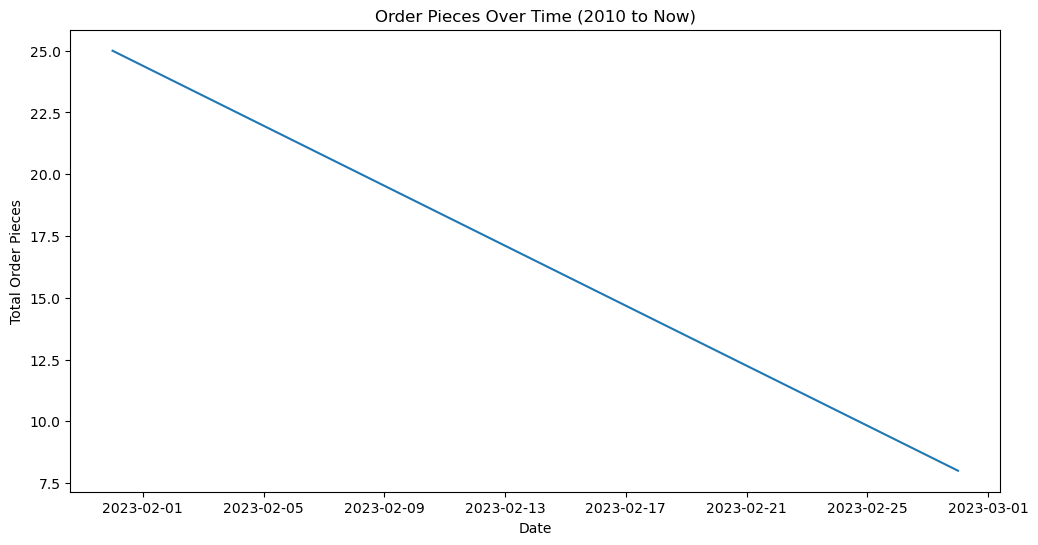

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame creation (replace with your actual data loading)
data = {
    'Name': ['Product A', 'Product B', 'Product C'],
    'Created_at': ['2023-01-01 10:00:00', '2023-01-05 15:30:00', '2023-02-01 08:45:00'],
    'Lineitem quantity': [10, 15, 8]
}
df = pd.DataFrame(data)

# Convert 'Created_at' to datetime format
df['Created_at'] = pd.to_datetime(df['Created_at'], utc=True, errors='coerce')

# Set 'Created_at' as the index of the DataFrame
df.set_index('Created_at', inplace=True)

# Sort the index in ascending order
df.sort_index(inplace=True)

# Slice the DataFrame to include data from 2010 to now (assuming it's datetime-like)
df = df['2010-01-01':]

# Resample sales data by month, aggregating by sum of 'Lineitem quantity'
order_pieces_over_time = df.resample('M').agg({'Lineitem quantity': 'sum'})

# Plot the order pieces over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=order_pieces_over_time, x=order_pieces_over_time.index, y='Lineitem quantity')
plt.title('Order Pieces Over Time (2010 to Now)')
plt.xlabel('Date')
plt.ylabel('Total Order Pieces')
plt.show()



